## CRQ-1 


[CRQ1] What are the time slots of the match with more goals? Let's analyse and visualise the goals distribution into 9-minutes sets for all the matches. I.e., let's transform the minute of a goal from a continuous variable in a discrete variable (e.g. A goal scored in 5th minute, will end up in the interval [0-9)). Remind that every match goes usually from minute 0, to minute 90, but in football it is always added an arbitary amount of extra-time to every half of the match, thus consider also the intervals "45+" and "90+".

    Make a barplot with the absolute frequency of goals in all the time slots.
    Find the top 10 teams that score the most in the interval "81-90".
    Show if there are players that were able to score at least one goal in 8 different intervals.



In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
matches_england=pd.read_json(r"matches\matches_England.json")
matches_england.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,1609,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,1612,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,1611,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364


In [20]:
events_england=pd.read_json(r"events\events_England.json")
events_england.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175


In [21]:
eventofshoot=events_england[events_england["subEventName"]=="Shot"]["tags"].reset_index(drop=False)
eventofshoot.rename(columns={"index":"exindex"},inplace=True)
eventofshoot.head()

,exindex,tags
0,46,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':..."
1,62,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'..."
2,91,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':..."
3,128,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'..."
4,249,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'..."


In [23]:
#if eventof shoot tags == 101 select them and filter the data by if they are true 
goals=[]
counter=0
for i in range(eventofshoot.shape[0]):
    goals.append(eventofshoot["tags"][i][0]["id"]==101)
        
goals=eventofshoot[goals]
goals.drop(["tags"],axis=1,inplace=True)
goals.head()

C:\Users\vedat\Anaconda3\envs\DataScience\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,exindex
0,46
2,91
10,554
14,898
18,1107


In [24]:
#selecting the only goal shoots from events of england
events_england=events_england.loc[goals["exindex"]]
events_england.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280
554,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",12829,"[{'y': 54, 'x': 94}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,1710.855093,100,177959759
898,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",7945,"[{'y': 50, 'x': 92}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,2815.900791,100,177960130
1107,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",12829,"[{'y': 54, 'x': 92}, {'y': 100, 'x': 100}]",2499719,Shot,1631,2H,634.312236,100,177960379


In [25]:
#converting seconds to minute 
events_england["eventSec"]= events_england["eventSec"]/60
events_england.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,1.576596,100,177959212
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,4.245750,100,177959280
554,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",12829,"[{'y': 54, 'x': 94}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,28.514252,100,177959759
898,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",7945,"[{'y': 50, 'x': 92}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,46.931680,100,177960130
1107,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",12829,"[{'y': 54, 'x': 92}, {'y': 100, 'x': 100}]",2499719,Shot,1631,2H,10.571871,100,177960379


In [26]:
#converting columns in to integer and assign them into specified intervals
events_england["eventSec"]=events_england["eventSec"].astype(int)
events_england['interval'] = np.digitize(events_england['eventSec'], [i for i in range(9,55,9)], right=True) + 1

In [31]:
# for the second half add 6 to interval
events_england.loc[events_england[events_england["matchPeriod"]=="2H"].index,"interval"] += 6

In [35]:
# grouping by intervals
data=events_england.groupby("interval").count()
data

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
interval,,,,,,,,,,,,
1,74,74,74,74,74,74,74,74,74,74,74,74
2,74,74,74,74,74,74,74,74,74,74,74,74
3,77,77,77,77,77,77,77,77,77,77,77,77
4,69,69,69,69,69,69,69,69,69,69,69,69
5,82,82,82,82,82,82,82,82,82,82,82,82
6,12,12,12,12,12,12,12,12,12,12,12,12
7,106,106,106,106,106,106,106,106,106,106,106,106
8,99,99,99,99,99,99,99,99,99,99,99,99
9,94,94,94,94,94,94,94,94,94,94,94,94


## Goal frequencies Bar plot

Text(0.5, 1.0, 'Goal Frequencies in Time Interval')

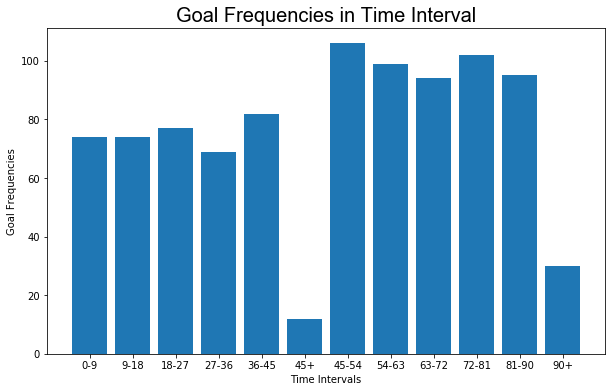

In [36]:
plt.figure(figsize=(10,6))
plt.bar(data.index,data.iloc[:,1],tick_label=["0-9","9-18","18-27","27-36","36-45","45+","45-54","54-63","63-72","72-81","81-90","90+"])
plt.xlabel("Time Intervals")
plt.ylabel("Goal Frequencies")

plt.title("Goal Frequencies in Time Interval",fontname='Arial',fontsize=20)

In [12]:
teamsdata=pd.read_json("teams.json")
teamsdata=teamsdata[["name","wyId"]]

In [37]:
#finding the topten score team 
toptenteam=events_england[events_england["interval"]==11].groupby("teamId").count().sort_values(
    "eventId",ascending=False).iloc[:10].reset_index().merge(teamsdata,left_on="teamId",right_on="wyId")[["eventId","name"]]

## Top ten score n interval 81-90

In [14]:
toptenteam.rename(columns={"eventId":"81-90 goals"},inplace=True)
toptenteam

,81-90 goals,name
0,13,Manchester City
1,10,Manchester United
2,8,Arsenal
3,7,Chelsea
4,7,Liverpool
5,7,Watford
6,7,Tottenham Hotspur
7,5,AFC Bournemouth
8,5,West Ham United
9,5,Crystal Palace


In [15]:

playerid=[]
for i in pd.unique(events_england["playerId"]):
    if len(pd.unique(events_england.groupby("playerId").get_group(i)["interval"])) >= 8 :
        playerid.append(i)
  


In [16]:
dataset=pd.read_json("players.json")
dataset=dataset[dataset["wyId"].isin(playerid)]

## People who score at least 8 times intervals


In [38]:
dataset[["firstName","lastName"]]

,firstName,lastName
671,Romelu,Lukaku Menama
745,Harry,Kane
841,Raheem Shaquille,Sterling
910,Gabriel Fernando,de Jesus
917,Jamie,Vardy
1191,Roberto Firmino,Barbosa de Oliveira
1719,Mohamed,Salah Ghaly
1800,Sadio,Man\u00e9
2990,Alexandre,Lacazette
3018,Wilfried,Zaha
